In [62]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import keras
import sklearn

# import matplotlib.font_manager as fm  # 그래프에 한글 적용
# font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()  # 사용할 폰트 호출
# plt.rc("font", family=font_name)  # 폰트를 plt.rc에 넘겨줘야 함

mpl.rcParams["axes.unicode_minus"] = False  # "-"(마이너스)를 문자로 쓰지 않겠다.

# Using TensorFlow backend. .keras 폴더에 keras.json파일이 있음. 거기 backend로 tensorflow로 지정되어있음. 경우에 따라 바꿀 수 있음

from sklearn import datasets # 연습용 데이터 불러오기 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

## 로지스틱 쓰려면 이거 import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


# 선형 모델을 위한 모듈
from keras.models import Sequential, load_model
from keras.layers.core import Dense

# 선형 회귀에서 많이쓰는 옵티마이저 알고리즘.
from keras.optimizers import RMSprop, Adam

# 숫자와 관련된 전처리(one_hot encoding 같은)
from keras.utils import np_utils

# early stopping
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

# K-fold
from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)

from keras.models import load_model


1.15.0


In [0]:
# https://dailyheumsi.tistory.com/95 를 참고하여 작성함. 

In [2]:
dataset = pd.read_csv("data/final/0415finalData.csv", encoding = "euc-kr", index_col=None)

In [3]:
dataset.columns.values

array(['rackID', 'rackName', 'rackCount', 'p25m', 's25m', 'p50m', 's50m',
       'p75m', 's75m', 'p100m', 's100m', 'g25m', 'c25m', 'b25m', 'g50m',
       'c50m', 'b50m', 'g75m', 'c75m', 'b75m', 'g100m', 'c100m', 'b100m',
       'slope', 'river_m', 'bikeroad_m', 'mainpark_m', 'genpark_m',
       'pub_m', 'sub_m', 'univ_m', 'month', 'day', 'LPpopulation',
       'LFpopulation', 'meanOn', 'meanOff', 'rent_cnt', 'return_cnt'],
      dtype=object)

In [4]:
# 데이터 정제하기 
dataset.isna().sum()
dataset = dataset.dropna()

In [5]:
# one-hot encoding 
dataset = dataset.join(pd.get_dummies(dataset['day'], prefix="day")) 
dataset = dataset.join(pd.get_dummies(dataset['month'], prefix="month")) 
dataset = dataset.join(pd.get_dummies(dataset['slope'], prefix="slope")) 

In [7]:
rackslope = ["slope_" + str(i) for i in ['0-2%', '2-7%', '7-15%', '15-30%', '30-60%', '60-100%','기타']]
dayofweek = ["day_" + str(i) for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
monthofyear = ["month_"+str(i) for i in range(1, 12)] 

In [8]:
# selected features 
columns = ['rackID', 'p25m', 's25m', 'p50m', 's50m',
       'p75m', 's75m', 'p100m', 's100m', 'g25m', 'c25m', 'b25m', 'g50m',
       'c50m', 'b50m', 'g75m', 'c75m', 'b75m', 'g100m', 'c100m', 'b100m',
       'river_m', 'bikeroad_m', 'mainpark_m', 'genpark_m', 'pub_m', 'sub_m', 'univ_m', 'LPpopulation',
       'LFpopulation', 'meanOn', 'meanOff', 'rent_cnt', 'return_cnt']
x_con = ['p25m', 's25m', 'p50m', 's50m',
       'p75m', 's75m', 'p100m', 's100m', 'g25m', 'c25m', 'b25m', 'g50m',
       'c50m', 'b50m', 'g75m', 'c75m', 'b75m', 'g100m', 'c100m', 'b100m',
       'river_m', 'bikeroad_m', 'mainpark_m', 'genpark_m', 'pub_m', 'sub_m', 'univ_m', 'LPpopulation',
       'LFpopulation', 'meanOn', 'meanOff']
xy_con = ['p25m', 's25m', 'p50m', 's50m',
       'p75m', 's75m', 'p100m', 's100m', 'g25m', 'c25m', 'b25m', 'g50m',
       'c50m', 'b50m', 'g75m', 'c75m', 'b75m', 'g100m', 'c100m', 'b100m',
       'river_m', 'bikeroad_m', 'mainpark_m', 'genpark_m', 'pub_m', 'sub_m', 'univ_m', 'LPpopulation',
       'LFpopulation', 'meanOn', 'meanOff',  'rent_cnt', 'return_cnt']
slope = ['slope']
month = ['month']
day = ['day']

In [10]:
features = ['rackID'] + x_con + rackslope + dayofweek + monthofyear + ['rent_cnt', 'return_cnt'] 
# features = selected + monthofyear + ['rent_cnt', 'return_cnt'] 
# features = selected + month + ['rent_cnt', 'return_cnt'] 
print(features)
datasetAll = dataset[features]

['rackID', 'p25m', 's25m', 'p50m', 's50m', 'p75m', 's75m', 'p100m', 's100m', 'g25m', 'c25m', 'b25m', 'g50m', 'c50m', 'b50m', 'g75m', 'c75m', 'b75m', 'g100m', 'c100m', 'b100m', 'river_m', 'bikeroad_m', 'mainpark_m', 'genpark_m', 'pub_m', 'sub_m', 'univ_m', 'LPpopulation', 'LFpopulation', 'meanOn', 'meanOff', 'slope_0-2%', 'slope_2-7%', 'slope_7-15%', 'slope_15-30%', 'slope_30-60%', 'slope_60-100%', 'slope_기타', 'day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Friday', 'day_Saturday', 'day_Sunday', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'rent_cnt', 'return_cnt']


In [11]:
datasetAll.head()  

rackID     p25m     s25m     p50m     s50m      p75m     s75m     p100m  \
0     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
1     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
2     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
3     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
4     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   

     s100m     g25m  ...  month_4  month_5  month_6  month_7  month_8  \
0  7114.25  2296.89  ...        0        0        0        0        0   
1  7114.25  2296.89  ...        0        0        0        0        0   
2  7114.25  2296.89  ...        0        0        0        0        0   
3  7114.25  2296.89  ...        0        0        0        0        0   
4  7114.25  2296.89  ...        0        0        0        0        0   

   month_9  month_10  month_11  rent_cnt  return_cnt  
0        0         0         0        34          42  
1        0         0         0        36          23  
2        0         0         0        28          34  
3        0         0         0        24          29  
4        0         0         0        46          35  

[5 rows x 59 columns]

In [87]:
# Data Normalization 
train_stats = datasetAll[xy_con].describe()
train_stats = train_stats.transpose()
train_stats

temp = train_stats[['mean','std']]
temp.to_csv('final_data/Normalization.csv', encoding="euc-kr", index=True)

In [13]:
# Normalization 
def norm(x):
    return(x - train_stats['mean']) / train_stats['std']

normed_dataset = norm(datasetAll[xy_con])
print(normed_dataset.info())
normed_dataset.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117194 entries, 0 to 117193
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   p25m          117194 non-null  float64
 1   s25m          117194 non-null  float64
 2   p50m          117194 non-null  float64
 3   s50m          117194 non-null  float64
 4   p75m          117194 non-null  float64
 5   s75m          117194 non-null  float64
 6   p100m         117194 non-null  float64
 7   s100m         117194 non-null  float64
 8   g25m          117194 non-null  float64
 9   c25m          117194 non-null  float64
 10  b25m          117194 non-null  float64
 11  g50m          117194 non-null  float64
 12  c50m          117194 non-null  float64
 13  b50m          117194 non-null  float64
 14  g75m          117194 non-null  float64
 15  c75m          117194 non-null  float64
 16  b75m          117194 non-null  float64
 17  g100m         117194 non-null  float64
 18  c100

p25m      s25m      p50m      s50m      p75m      s75m    p100m  \
117189 -0.219031 -0.315148 -0.366631  0.493707 -0.509602  1.049889 -0.62271   
117190 -0.219031 -0.315148 -0.366631  0.493707 -0.509602  1.049889 -0.62271   
117191 -0.219031 -0.315148 -0.366631  0.493707 -0.509602  1.049889 -0.62271   
117192 -0.219031 -0.315148 -0.366631  0.493707 -0.509602  1.049889 -0.62271   
117193 -0.219031 -0.315148 -0.366631  0.493707 -0.509602  1.049889 -0.62271   

           s100m      g25m      c25m  ...  genpark_m     pub_m    sub_m  \
117189  0.979042 -0.179315 -0.118319  ...   0.235454 -0.617367  0.17704   
117190  0.979042 -0.179315 -0.118319  ...   0.235454 -0.617367  0.17704   
117191  0.979042 -0.179315 -0.118319  ...   0.235454 -0.617367  0.17704   
117192  0.979042 -0.179315 -0.118319  ...   0.235454 -0.617367  0.17704   
117193  0.979042 -0.179315 -0.118319  ...   0.235454 -0.617367  0.17704   

        univ_m  LPpopulation  LFpopulation    meanOn   meanOff  rent_cnt  \
117189 -0.5339     -0.370419     -0.453861 -0.257662 -0.297310  0.851428   
117190 -0.5339     -0.323060     -0.434300 -0.516426 -0.510046  0.049283   
117191 -0.5339     -0.409675     -0.450412 -0.088088 -0.131083  0.257971   
117192 -0.5339     -0.420402     -0.460720 -0.077605 -0.115979  0.257971   
117193 -0.5339     -0.415542     -0.443255 -0.073955 -0.111460  0.310143   

        return_cnt  
117189    0.673410  
117190   -0.089867  
117191    0.201792  
117192    0.363135  
117193    0.121120  

[5 rows x 33 columns]

In [14]:
datasetAN = datasetAll.join(normed_dataset, rsuffix="_normed")
datasetAN.head()

rackID     p25m     s25m     p50m     s50m      p75m     s75m     p100m  \
0     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
1     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
2     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
3     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   
4     101  1371.62  1245.51  7156.67  1829.57  16666.71  3343.56  22512.39   

     s100m     g25m  ...  genpark_m_normed  pub_m_normed  sub_m_normed  \
0  7114.25  2296.89  ...         -0.089545      1.538588      0.396701   
1  7114.25  2296.89  ...         -0.089545      1.538588      0.396701   
2  7114.25  2296.89  ...         -0.089545      1.538588      0.396701   
3  7114.25  2296.89  ...         -0.089545      1.538588      0.396701   
4  7114.25  2296.89  ...         -0.089545      1.538588      0.396701   

   univ_m_normed  LPpopulation_normed  LFpopulation_normed  meanOn_normed  \
0      -0.076356            -0.411764            -0.153248      -0.139137   
1      -0.076356            -0.470454            -0.181104      -0.231167   
2      -0.076356            -0.449799            -0.134666      -0.334770   
3      -0.076356            -0.516139            -0.148352      -0.586072   
4      -0.076356            -0.446683            -0.169908      -0.177741   

   meanOff_normed  rent_cnt_normed  return_cnt_normed  
0       -0.034478        -0.752862          -0.666978  
1       -0.147699        -0.739819          -0.784882  
2       -0.234298        -0.791991          -0.716622  
3       -0.532405        -0.818077          -0.747649  
4       -0.089352        -0.674604          -0.710417  

[5 rows x 92 columns]

In [15]:
datasetAN.columns.values

array(['rackID', 'p25m', 's25m', 'p50m', 's50m', 'p75m', 's75m', 'p100m',
       's100m', 'g25m', 'c25m', 'b25m', 'g50m', 'c50m', 'b50m', 'g75m',
       'c75m', 'b75m', 'g100m', 'c100m', 'b100m', 'river_m', 'bikeroad_m',
       'mainpark_m', 'genpark_m', 'pub_m', 'sub_m', 'univ_m',
       'LPpopulation', 'LFpopulation', 'meanOn', 'meanOff', 'slope_0-2%',
       'slope_2-7%', 'slope_7-15%', 'slope_15-30%', 'slope_30-60%',
       'slope_60-100%', 'slope_기타', 'day_Monday', 'day_Tuesday',
       'day_Wednesday', 'day_Thursday', 'day_Friday', 'day_Saturday',
       'day_Sunday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'rent_cnt', 'return_cnt', 'p25m_normed', 's25m_normed',
       'p50m_normed', 's50m_normed', 'p75m_normed', 's75m_normed',
       'p100m_normed', 's100m_normed', 'g25m_normed', 'c25m_normed',
       'b25m_normed', 'g50m_normed', 'c50m_normed', 'b50m_normed',
       'g75m_normed', '

In [16]:
normed_x_con = ['p25m_normed', 's25m_normed',
       'p50m_normed', 's50m_normed', 'p75m_normed', 's75m_normed',
       'p100m_normed', 's100m_normed', 'g25m_normed', 'c25m_normed',
       'b25m_normed', 'g50m_normed', 'c50m_normed', 'b50m_normed',
       'g75m_normed', 'c75m_normed', 'b75m_normed', 'g100m_normed',
       'c100m_normed', 'b100m_normed', 'river_m_normed',
       'bikeroad_m_normed', 'mainpark_m_normed', 'genpark_m_normed',
       'pub_m_normed', 'sub_m_normed', 'univ_m_normed',
       'LPpopulation_normed', 'LFpopulation_normed', 'meanOn_normed',
       'meanOff_normed']
x_cat = ['slope_0-2%',
       'slope_2-7%', 'slope_7-15%', 'slope_15-30%', 'slope_30-60%',
       'slope_60-100%', 'slope_기타', 'day_Monday', 'day_Tuesday',
       'day_Wednesday', 'day_Thursday', 'day_Friday', 'day_Saturday',
       'day_Sunday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11']
normed_x_var = normed_x_con + x_cat 
normed_y = ['rent_cnt_normed', 'return_cnt_normed']
normed_xy = normed_x_var + normed_y
normed_xy_con = normed_x_con + normed_y

In [17]:
dataset_normed = datasetAN[normed_xy]
dataset_pairplot = datasetAN[normed_xy_con]

In [18]:
dataset_normed.head(2)

p25m_normed  s25m_normed  p50m_normed  s50m_normed  p75m_normed  \
0    -0.095413     4.352285     -0.01038     1.334829     0.064585   
1    -0.095413     4.352285     -0.01038     1.334829     0.064585   

   s75m_normed  p100m_normed  s100m_normed  g25m_normed  c25m_normed  ...  \
0     0.737912     -0.073687      0.796619     0.129332    -0.118319  ...   
1     0.737912     -0.073687      0.796619     0.129332    -0.118319  ...   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0        0        0        0        0        0        0         0         0   
1        0        0        0        0        0        0         0         0   

   rent_cnt_normed  return_cnt_normed  
0        -0.752862          -0.666978  
1        -0.739819          -0.784882  

[2 rows x 58 columns]

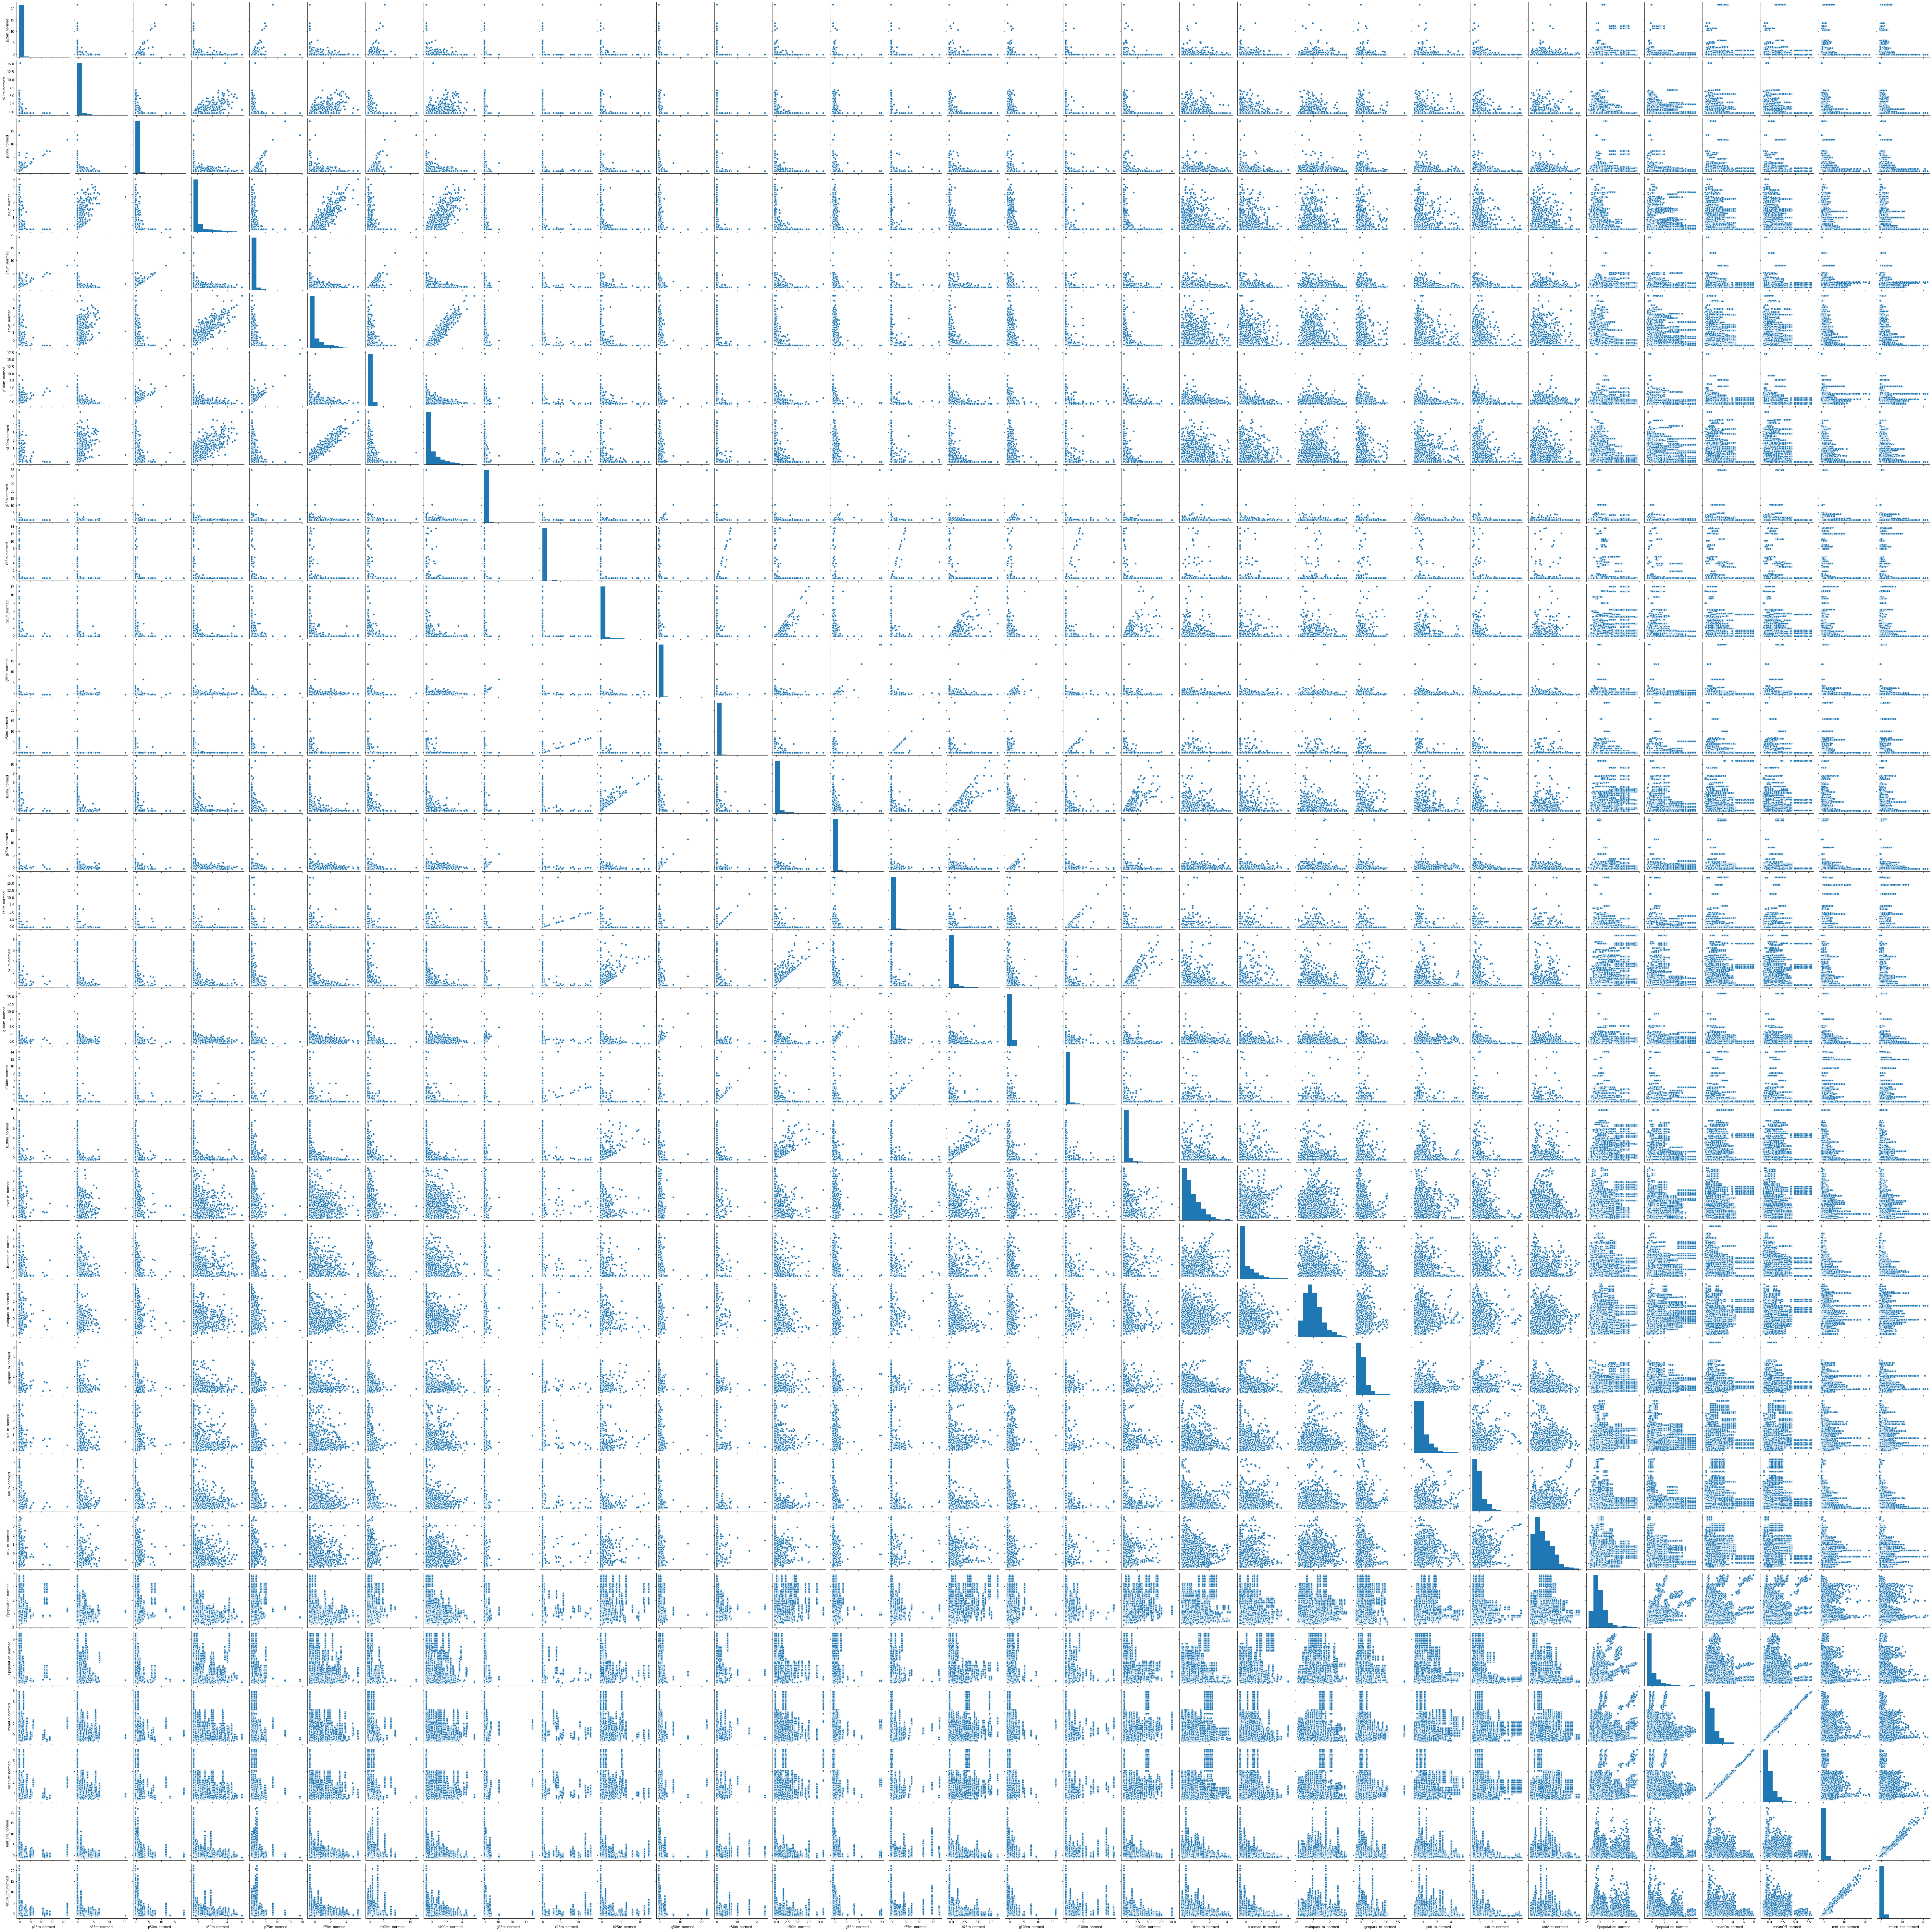

In [35]:
sns.pairplot(dataset_pairplot)

In [19]:
dataset_normed.to_csv('data/final/0421dataset_normed.csv', encoding="euc-kr", index=False)

In [20]:
dataset_normed = pd.read_csv('data/final/0421dataset_normed.csv', encoding="euc-kr")

In [21]:
# selected features 
normed_area_25 = ['p25m_normed', 's25m_normed','g25m_normed', 'c25m_normed','b25m_normed']
normed_area_50 = ['p50m_normed', 's50m_normed', 'g50m_normed', 'c50m_normed', 'b50m_normed']
normed_area_75 = ['p75m_normed', 's75m_normed','g75m_normed', 'c75m_normed', 'b75m_normed']
normed_area_100 = ['p100m_normed', 's100m_normed', 'g100m_normed','c100m_normed', 'b100m_normed']
normed_x_distance = ['river_m_normed','bikeroad_m_normed', 'mainpark_m_normed', 'genpark_m_normed',
       'pub_m_normed', 'sub_m_normed', 'univ_m_normed']
normed_x_people = ['LPpopulation_normed', 'LFpopulation_normed', 'meanOn_normed','meanOff_normed']
x_cat = ['slope_0-2%', 'slope_2-7%', 'slope_7-15%', 'slope_15-30%', 'slope_30-60%',
       'slope_60-100%', 'slope_기타', 'day_Monday', 'day_Tuesday',
       'day_Wednesday', 'day_Thursday', 'day_Friday', 'day_Saturday', 'day_Sunday', 
       'month_1', 'month_2', 'month_3', 'month_4','month_5', 'month_6', 
       'month_7', 'month_8', 'month_9', 'month_10','month_11']
# normed_y = ['rent_cnt_normed', 'return_cnt_normed']

In [22]:
features_25 = normed_area_25 + normed_x_distance + normed_x_people + x_cat
features_50 = normed_area_50 + normed_x_distance + normed_x_people + x_cat
features_75 = normed_area_75 + normed_x_distance + normed_x_people + x_cat
features_100 = normed_area_100 + normed_x_distance + normed_x_people + x_cat

In [0]:
# 데이터 나누기 : train vs. test
from sklearn.model_selection import train_test_split 

# return_cnt_normed 정규화 100m
X_train, X_test, y_train, y_test = train_test_split(dataset_normed[features_100], datasetAN['rent_cnt_normed'], test_size=0.2, random_state=42)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93755 entries, 74113 to 15795
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   p100m_normed         93755 non-null  float64
 1   s100m_normed         93755 non-null  float64
 2   g100m_normed         93755 non-null  float64
 3   c100m_normed         93755 non-null  float64
 4   b100m_normed         93755 non-null  float64
 5   river_m_normed       93755 non-null  float64
 6   bikeroad_m_normed    93755 non-null  float64
 7   mainpark_m_normed    93755 non-null  float64
 8   genpark_m_normed     93755 non-null  float64
 9   pub_m_normed         93755 non-null  float64
 10  sub_m_normed         93755 non-null  float64
 11  univ_m_normed        93755 non-null  float64
 12  LPpopulation_normed  93755 non-null  float64
 13  LFpopulation_normed  93755 non-null  float64
 14  meanOn_normed        93755 non-null  float64
 15  meanOff_normed       93755 non-n

In [44]:
y_train

74113     0.355793
58729     0.486224
18538    -0.381136
41085    -0.152884
45287    -0.602868
            ...   
76820    -0.746341
110268   -0.641997
103694    0.394922
860      -0.446352
15795    -0.915900
Name: rent_cnt_normed, Length: 93755, dtype: float64

In [45]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(93755, 41)
(93755,)
(23439, 41)
(23439,)


# Keras 1

In [0]:
# def build_model():
#   model = keras.Sequential([
#     Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(1)
#   ])

#   optimizer = keras.optimizers.RMSprop(0.001)

#   model.compile(loss='mse',
#                 optimizer="adam",
#                 metrics=['mae'])
#   early_stopping = EarlyStopping(patience= 30)

#   return model

In [0]:
# model = build_model()

In [49]:
model1 = Sequential()
model1.add(Dense(128, input_shape=(X_train.shape[1],), activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1))

model1.compile(loss="mse", optimizer="adam", metrics=["mae"])
early_stopping = EarlyStopping(patience= 30)
model1.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=1)  

Epoch 1/1000
93755/93755 [==============================] - 3s 28us/step - loss: 0.4876 - mae: 0.4293
Epoch 2/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.2506 - mae: 0.3171
Epoch 3/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.1679 - mae: 0.2605
Epoch 4/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.1296 - mae: 0.2297
Epoch 5/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.1113 - mae: 0.2098
Epoch 6/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.0973 - mae: 0.1975
Epoch 7/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.0842 - mae: 0.1849
Epoch 8/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.0805 - mae: 0.1792
Epoch 9/1000
93755/93755 [==============================] - 2s 24us/step - loss: 0.0702 - mae: 0.1698
Epoch 10/1000
93755/93755 [==============================] - 2s 24us/step - loss: 

In [50]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5376      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 55,041
Trainable params: 55,041
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"]) # 기본 optimizer를 쓸 때 
# metrics = ["mae"] mean abusolute error절대값. 별도 지정하지 않으면 accuracy로 지정됨. 
# model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"]) 
# model.compile(loss = "mse", optimizer=RMSprop(lr=0.01),metrics=["mae", "mse"]) # mean squared error, optimizer= 최소비용 알고리즘
# model.compile(loss = "mse", optimizer=Adam(),metrics=["mae", "mse"]) # mean squared error, optimizer= 최소비용 알고리즘
# model.compile(loss = "mse", optimizer='sgd',metrics=["mae", "mse"]) # mean squared error, optimizer= 최소비용 알고리즘

In [52]:
# 테스트 데이터에 대한 적합도 검정
mse, mae = model1.evaluate(X_test, y_test, verbose=1) 
# 평균제곱오차, 평균절대오차
print(mse, mae)

23439/23439 [==============================] - 1s 22us/step
0.03565668723473613 0.11861884593963623


In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [56]:
pred1 = model1.predict(X_test)

print('mse:', mean_squared_error(y_test.values, pred1), 
      '\nr2:', r2_score(y_test, pred1), 
      '\nmae:', np.mean(np.abs(y_test.values - pred1)/ y_test.values)*100)
# 여기 mae식은 좀 이상하네요. 

mse: 0.0356566882535474 
r2: 0.9650644865905694 
mae: -59.206130750103206


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test.values, pred1)

# Keras PC_Return Model3

In [23]:
# return_cnt_normed 정규화 50
X_train, X_test, y_train, y_test = train_test_split(dataset_normed[features_50], datasetAll["return_cnt"], test_size=0.2, random_state=42)

In [69]:
dataset_normed[features_50].to_csv("X.csv", mode='w')
datasetAll[["rent_cnt","return_cnt"]].to_csv("y.csv", mode='w')

In [46]:
y_test

25803      47
110547     80
6452      119
103195     44
45887      84
         ... 
105685    122
57700     164
89414      43
54761      48
73020      48
Name: return_cnt, Length: 23439, dtype: int64

In [28]:
model3 = Sequential()
model3.add(Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(1))

model3.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])
early_stopping = EarlyStopping(monitor='mae', patience= 50)
history = model3.fit(X_train, y_train, epochs=100, batch_size=10, validation_split = 0.2, verbose=1)  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 75004 samples, validate on 18751 samples
Epoch 1/100
75004/75004 [==============================] - 7s 90us/step - loss: 17432.0565 - mse: 17432.0488 - mae: 79.9062 - val_loss: 15871.0786 - val_mse: 15871.0869 - val_mae: 72.7319
Epoch 2/100
75004/75004 [==============================] - 7s 89us/step - loss: 13428.9550 - mse: 13428.9580 - mae: 70.3676 - val_loss: 11835.4651 - val_mse: 11835.4814 - val_mae: 66.3672
Epoch 3/100
75004/75004 [==============================] - 7s 89us/step - loss: 10362.3092 - mse: 10362.3115 - mae: 63.7321 - val_loss: 9258.2326 - val_mse: 9258.2295 - val_mae: 62.5814
Epoch 4/100
75004/75004 [==============================] - 7s 89us/step - loss: 8033.9434 - mse: 8033.9517 - mae: 58.2726 - val_loss: 7777.0790 - val_mse: 7777.0776 - val_mae: 57.5262
Epoch 5/100
75004/75004 [==============================] - 7s 90us/step - loss: 6822.9842 - mse: 6822.9966 - mae: 54.1106 

Epoch 42/100
75004/75004 [==============================] - 7s 88us/step - loss: 1318.9527 - mse: 1318.9519 - mae: 24.3294 - val_loss: 1434.2064 - val_mse: 1434.2062 - val_mae: 24.9249
Epoch 43/100
75004/75004 [==============================] - 7s 88us/step - loss: 1315.1707 - mse: 1315.1698 - mae: 24.3138 - val_loss: 1397.0130 - val_mse: 1397.0127 - val_mae: 25.0722
Epoch 44/100
75004/75004 [==============================] - 7s 87us/step - loss: 1284.0677 - mse: 1284.0675 - mae: 24.0565 - val_loss: 1444.2123 - val_mse: 1444.2114 - val_mae: 25.0851
Epoch 45/100
75004/75004 [==============================] - 7s 87us/step - loss: 1266.5225 - mse: 1266.5221 - mae: 23.9686 - val_loss: 1604.1069 - val_mse: 1604.1078 - val_mae: 26.1304
Epoch 46/100
75004/75004 [==============================] - 7s 88us/step - loss: 1251.0898 - mse: 1251.0896 - mae: 23.6681 - val_loss: 1314.6426 - val_mse: 1314.6426 - val_mae: 24.2111
Epoch 47/100
75004/75004 [==============================] - 7s 89us/step - 

75004/75004 [==============================] - 7s 89us/step - loss: 941.9656 - mse: 941.9658 - mae: 20.8907 - val_loss: 1337.7829 - val_mse: 1337.7841 - val_mae: 23.3368
Epoch 87/100
75004/75004 [==============================] - 7s 87us/step - loss: 946.2493 - mse: 946.2498 - mae: 20.8922 - val_loss: 1103.3322 - val_mse: 1103.3329 - val_mae: 21.9636
Epoch 88/100
75004/75004 [==============================] - 7s 89us/step - loss: 941.1199 - mse: 941.1191 - mae: 20.7946 - val_loss: 1167.2453 - val_mse: 1167.2449 - val_mae: 22.8726
Epoch 89/100
75004/75004 [==============================] - 7s 88us/step - loss: 927.8880 - mse: 927.8887 - mae: 20.7464 - val_loss: 1153.7502 - val_mse: 1153.7505 - val_mae: 22.3083
Epoch 90/100
75004/75004 [==============================] - 7s 88us/step - loss: 923.2241 - mse: 923.2256 - mae: 20.7040 - val_loss: 1255.0028 - val_mse: 1255.0035 - val_mae: 22.9773
Epoch 91/100
75004/75004 [==============================] - 7s 89us/step - loss: 920.2666 - mse: 9

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

val_loss      val_mse    val_mae        loss         mse        mae  \
95  1112.973873  1112.973755  21.863207  884.993849  884.993835  20.392094   
96  1130.507696  1130.506470  21.965231  898.083358  898.083923  20.340635   
97  1225.169936  1225.169800  23.119886  896.587310  896.587585  20.340311   
98  1223.984835  1223.984009  22.819597  891.896387  891.894592  20.319288   
99  1091.203845  1091.203003  22.329273  880.778958  880.779541  20.245953   

    epoch  
95     95  
96     96  
97     97  
98     98  
99     99

In [48]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [return]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,100])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$return^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,10000])
    plt.legend()
    plt.show()

plot_history(history)

In [49]:
from sklearn.metrics import mean_absolute_error
pred3 = model3.predict(X_test)
print('mse:', mean_squared_error(y_test.values, pred3), 
      '\nr2:', r2_score(y_test, pred3), ""
      '\nmape:', np.mean(np.abs(y_test.values - pred3)/ y_test.values)*100)
print('\nmae:', mean_absolute_error(y_test.values, pred3))

C:\Users\acorn\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


mse: 1176.9096022145475 
r2: 0.9553541687250366 
mape: inf

mae: 22.6311426952871


In [50]:
loss, mae, mse = model3.evaluate(X_train, y_train, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} rent".format(mae))

테스트 세트의 평균 절대 오차: 863.06 rent


In [60]:
test_predictions = model3.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [return]')
plt.ylabel('Predictions [return]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 10000], [-100, 10000])

In [61]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [return]")
_ = plt.ylabel("Count")

In [63]:
# 모델 저장

model3.save('model_return.h5')

In [ ]:
## 모델 아키텍처 따로 저장
# 모델 아키텍처를 json 형식으로 저장
json_string = model3.to_json()
# json 파일에서 모델 아키텍처 재구성
model = model_from_json(json_string)
## Weights 따로 저장
model.save_weights()

In [ ]:
# 모델 가져오기 

model = load_model('model_return.h5')

# Keras PC_Rent Model 3

In [70]:
# return_cnt_normed 정규화 50
X_train, X_test, y_train, y_test = train_test_split(dataset_normed[features_50], datasetAll["rent_cnt"], test_size=0.2, random_state=42)

In [71]:
model3 = Sequential()
model3.add(Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(1))

model3.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])
early_stopping = EarlyStopping(monitor='mae', patience= 50)
history = model3.fit(X_train, y_train, epochs=101, batch_size=10, validation_split = 0.2, verbose=1)  

Train on 75004 samples, validate on 18751 samples
Epoch 1/101
75004/75004 [==============================] - 7s 92us/step - loss: 15457.8775 - mse: 15457.9014 - mae: 75.6376 - val_loss: 13968.1301 - val_mse: 13968.1396 - val_mae: 73.5183
Epoch 2/101
75004/75004 [==============================] - 7s 90us/step - loss: 12147.5781 - mse: 12147.5596 - mae: 66.7053 - val_loss: 11102.0562 - val_mse: 11102.0498 - val_mae: 63.3537
Epoch 3/101
75004/75004 [==============================] - 7s 91us/step - loss: 9457.2244 - mse: 9457.2129 - mae: 59.8951 - val_loss: 8664.9132 - val_mse: 8664.9180 - val_mae: 57.6096
Epoch 4/101
75004/75004 [==============================] - 7s 89us/step - loss: 7290.0198 - mse: 7290.0254 - mae: 54.5227 - val_loss: 6598.2253 - val_mse: 6598.2285 - val_mae: 53.6463
Epoch 5/101
75004/75004 [==============================] - 7s 89us/step - loss: 5913.3325 - mse: 5913.3335 - mae: 50.0333 - val_loss: 5268.7587 - val_mse: 5268.7539 - val_mae: 48.2146
Epoch 6/101
75004/7500

75004/75004 [==============================] - 7s 92us/step - loss: 1293.1700 - mse: 1293.1699 - mae: 24.0360 - val_loss: 1338.4702 - val_mse: 1338.4685 - val_mae: 24.3969
Epoch 46/101
75004/75004 [==============================] - 7s 91us/step - loss: 1284.8461 - mse: 1284.8490 - mae: 23.9436 - val_loss: 1466.4304 - val_mse: 1466.4303 - val_mae: 26.0886
Epoch 47/101
75004/75004 [==============================] - 7s 91us/step - loss: 1229.7342 - mse: 1229.7336 - mae: 23.6187 - val_loss: 1543.9461 - val_mse: 1543.9451 - val_mae: 25.6138
Epoch 48/101
75004/75004 [==============================] - 7s 91us/step - loss: 1252.3584 - mse: 1252.3604 - mae: 23.7404 - val_loss: 1509.6081 - val_mse: 1509.6085 - val_mae: 25.4769
Epoch 49/101
75004/75004 [==============================] - 7s 91us/step - loss: 1265.0853 - mse: 1265.0840 - mae: 23.7477 - val_loss: 1397.4498 - val_mse: 1397.4495 - val_mae: 24.4448
Epoch 50/101
75004/75004 [==============================] - 7s 93us/step - loss: 1222.46

75004/75004 [==============================] - 7s 93us/step - loss: 935.4377 - mse: 935.4381 - mae: 20.8804 - val_loss: 1118.8180 - val_mse: 1118.8179 - val_mae: 22.2141
Epoch 90/101
75004/75004 [==============================] - 7s 92us/step - loss: 961.7257 - mse: 961.7253 - mae: 20.8894 - val_loss: 1099.9118 - val_mse: 1099.9110 - val_mae: 22.0529
Epoch 91/101
75004/75004 [==============================] - 7s 92us/step - loss: 926.3748 - mse: 926.3740 - mae: 20.7713 - val_loss: 1150.4279 - val_mse: 1150.4280 - val_mae: 22.5194
Epoch 92/101
75004/75004 [==============================] - 7s 91us/step - loss: 958.2906 - mse: 958.2918 - mae: 20.8592 - val_loss: 1150.0352 - val_mse: 1150.0343 - val_mae: 22.2812
Epoch 93/101
75004/75004 [==============================] - 7s 92us/step - loss: 940.1261 - mse: 940.1276 - mae: 20.7271 - val_loss: 1112.5566 - val_mse: 1112.5564 - val_mae: 21.8230
Epoch 94/101
75004/75004 [==============================] - 7s 92us/step - loss: 954.4820 - mse: 9

In [72]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

val_loss      val_mse    val_mae        loss         mse        mae  \
96   1335.739929  1335.738770  23.067709  905.400982  905.399414  20.523970   
97   1375.985103  1375.986084  24.403814  921.201215  921.201233  20.568966   
98   1160.053118  1160.052979  22.132730  911.159251  911.160583  20.450880   
99   1157.382992  1157.384155  22.259300  908.701971  908.702271  20.540644   
100  1061.041232  1061.041260  21.976274  911.235655  911.235107  20.516733   

     epoch  
96      96  
97      97  
98      98  
99      99  
100    100

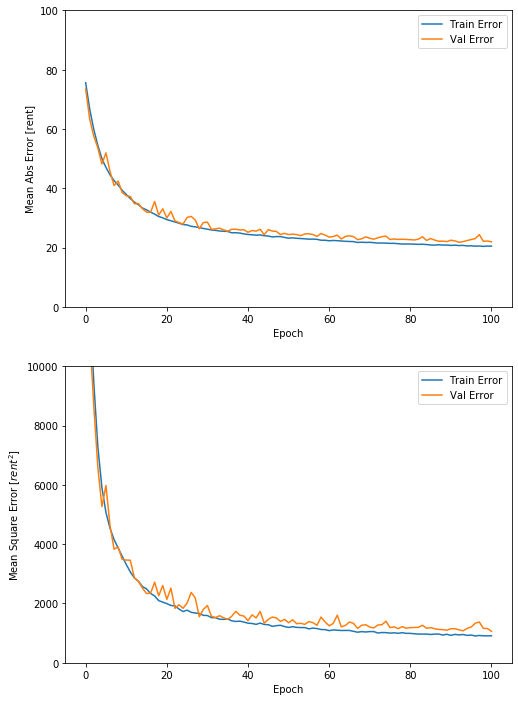

In [73]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [rent]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,100])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$rent^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,10000])
    plt.legend()
    plt.show()

plot_history(history)

In [74]:
from sklearn.metrics import mean_absolute_error
pred3 = model3.predict(X_test)
print('mse:', mean_squared_error(y_test.values, pred3), 
      '\nr2:', r2_score(y_test, pred3), ""
      '\nmape:', np.mean(np.abs(y_test.values - pred3)/ y_test.values)*100)
print('\nmae:', mean_absolute_error(y_test.values, pred3))

C:\Users\acorn\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


mse: 1239.0395210371448 
r2: 0.9483694458638324 
mape: inf

mae: 22.464797904575953


In [75]:
loss, mae, mse = model3.evaluate(X_train, y_train, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} rent".format(mae))

테스트 세트의 평균 절대 오차: 873.40 rent


In [76]:
test_predictions = model3.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [rent]')
plt.ylabel('Predictions [rent]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 10000], [-100, 10000])

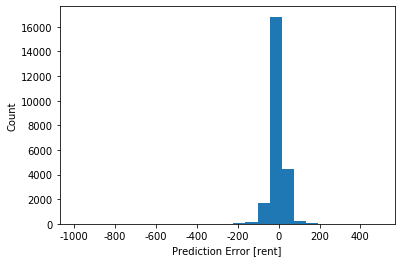

In [77]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [rent]")
_ = plt.ylabel("Count")

In [78]:
# 모델 저장

model3.save('model_rent.h5')

In [81]:
#predict with keras.model.predict
x_test = X_test.loc[25803]  # loc[]에 들어가는 인덱스는 X_test.head()로 확인하여 25803대신 원하는 번호 입력
x_test = np.expand_dims(x_test, axis = 0)
print('test input:')
print(x_test)
print('\rent_real', y_test.loc[25803]) #  y_test의 인덱스가 같아야 하는데 이것은 확인 필요. 
print('model7.predict:')
print(model3.predict(x_test))  # model7은 본인의 모델명으로 수정
print('지금 이 코드는 # rackID (이건 확인 따로 해야 함.), slope_15-30%, Monday, 2월 rent 수를 보여줍니다.')

test input:
[[-0.36037747  3.26926803  0.30413635 -0.1367114  -0.36661203 -0.22353175
  -0.04637897  0.13101702 -0.45354262 -0.67669992 -0.87197387 -0.52359515
  -0.64943962 -0.25874817 -0.33589483 -0.36168902  0.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
ent_real 65
model7.predict:
[[43.629448]]
지금 이 코드는 # rackID (이건 확인 따로 해야 함.), slope_15-30%, Monday, 2월 rent 수를 보여줍니다.
